In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, linear_model
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
%matplotlib inline
pd.plotting.register_matplotlib_converters()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv('./crime.csv')


In [3]:
data.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


In [4]:
data.head().T

,0,1,2,3,4
TYPE,Other Theft,Other Theft,Other Theft,Other Theft,Other Theft
YEAR,2003,2003,2003,2003,2003
MONTH,5,5,4,4,4
DAY,12,7,23,20,12
HOUR,16,15,16,11,17
MINUTE,15,20,40,15,45
HUNDRED_BLOCK,9XX TERMINAL AVE,9XX TERMINAL AVE,9XX TERMINAL AVE,9XX TERMINAL AVE,9XX TERMINAL AVE
NEIGHBOURHOOD,Strathcona,Strathcona,Strathcona,Strathcona,Strathcona
X,493906,493906,493906,493906,493906
Y,5.45745e+06,5.45745e+06,5.45745e+06,5.45745e+06,5.45745e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
TYPE             530652 non-null object
YEAR             530652 non-null int64
MONTH            530652 non-null int64
DAY              530652 non-null int64
HOUR             476290 non-null float64
MINUTE           476290 non-null float64
HUNDRED_BLOCK    530639 non-null object
NEIGHBOURHOOD    474028 non-null object
X                530652 non-null float64
Y                530652 non-null float64
Latitude         530652 non-null float64
Longitude        530652 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


In [6]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474015 entries, 0 to 530651
Data columns (total 12 columns):
TYPE             474015 non-null object
YEAR             474015 non-null int64
MONTH            474015 non-null int64
DAY              474015 non-null int64
HOUR             474015 non-null float64
MINUTE           474015 non-null float64
HUNDRED_BLOCK    474015 non-null object
NEIGHBOURHOOD    474015 non-null object
X                474015 non-null float64
Y                474015 non-null float64
Latitude         474015 non-null float64
Longitude        474015 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 47.0+ MB


In [8]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [9]:
data['DATE'] = pd.to_datetime({'year':data['YEAR'], 'month':data['MONTH'], 'day':data['DAY']})

In [10]:
data['DAY_OF_WEEK'] = data['DATE'].dt.dayofweek

In [11]:
data.index = pd.DatetimeIndex(data['DATE'])

In [12]:
data['TYPE'].value_counts().sort_index()

Break and Enter Commercial                                 33841
Break and Enter Residential/Other                          60856
Mischief                                                   70157
Other Theft                                                52160
Theft from Vehicle                                        170889
Theft of Bicycle                                           25620
Theft of Vehicle                                           38351
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Vehicle Collision or Pedestrian Struck (with Injury)       21887
Name: TYPE, dtype: int64

In [13]:
def get_common_category(ctype):
    if 'Theft' in ctype:
        return 'Theft'
    elif 'Break' in ctype:
        return 'Break and Enter'
    elif 'Collision' in ctype:
        return 'Vehicle Collision'
    else:
        return 'Others'

In [14]:
data['CATEGORY'] = data['TYPE'].apply(get_common_category)

In [15]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,DATE,DAY_OF_WEEK,CATEGORY
DATE,,,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-12,0,Theft
2003-05-07,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-07,2,Theft
2003-04-23,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-23,2,Theft
2003-04-20,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-20,6,Theft
2003-04-12,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-12,5,Theft


In [16]:
data = data[data['CATEGORY'] != 'Vehicle Collision']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451874 entries, 2003-05-12 to 2017-06-05
Data columns (total 15 columns):
TYPE             451874 non-null object
YEAR             451874 non-null int64
MONTH            451874 non-null int64
DAY              451874 non-null int64
HOUR             451874 non-null float64
MINUTE           451874 non-null float64
HUNDRED_BLOCK    451874 non-null object
NEIGHBOURHOOD    451874 non-null object
X                451874 non-null float64
Y                451874 non-null float64
Latitude         451874 non-null float64
Longitude        451874 non-null float64
DATE             451874 non-null datetime64[ns]
DAY_OF_WEEK      451874 non-null int64
CATEGORY         451874 non-null object
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 55.2+ MB


In [18]:
data.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,DATE,DAY_OF_WEEK,CATEGORY
DATE,,,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-05-12,0,Theft
2003-05-07,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-05-07,2,Theft
2003-04-23,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-04-23,2,Theft
2003-04-20,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-04-20,6,Theft
2003-04-12,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-04-12,5,Theft
2003-03-26,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-03-26,2,Theft
2003-03-10,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610,2003-03-10,0,Break and Enter
2003-06-28,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725,2003-06-28,5,Others
2003-02-16,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,2003-02-16,6,Theft


In [19]:
data.resample('D').size().idxmax()

Timestamp('2011-06-15 00:00:00', freq='D')

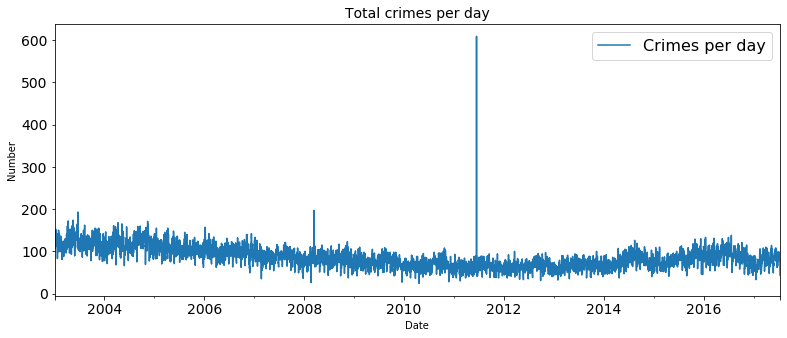

In [20]:
plt.figure(figsize=(13,5))
data.resample('D').size().plot(label='Crimes per day')
plt.title('Total crimes per day', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

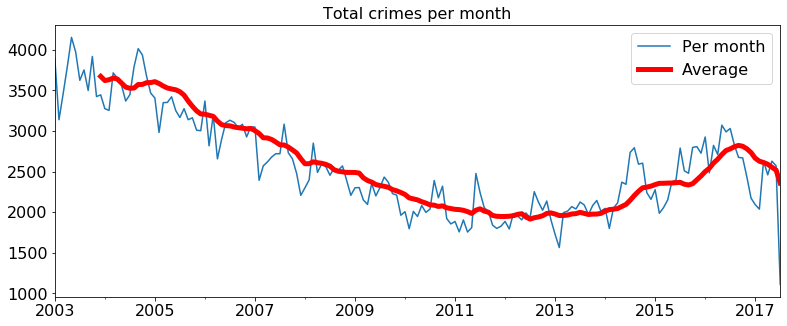

In [21]:
plt.figure(figsize=(13,5))
data.resample('M').size().plot(label='Per month')
data.resample('M').size().rolling(window=12).mean().plot(color='red', linewidth=5, label='Average')
plt.title('Total crimes per month', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

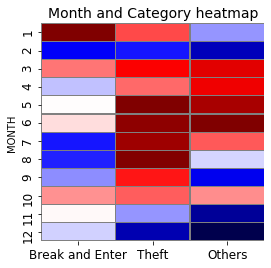

In [22]:
crimes_pivot_table = data.pivot_table(values='TYPE', index='CATEGORY', columns='MONTH', aggfunc=len)

crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

for i in [2,1]:
    crimes_scaled[crimes_pivot_table.index[i]] =  pd.DataFrame(crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max())
                    
plt.figure(figsize=(4,4))
plt.title('Month and Category heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

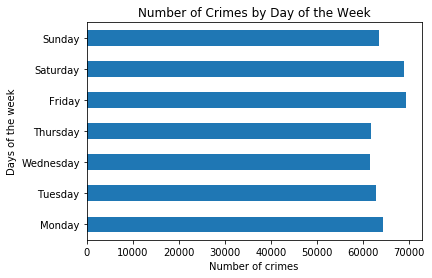

In [23]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby(data['DAY_OF_WEEK']).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of Crimes by Day of the Week')
plt.show()

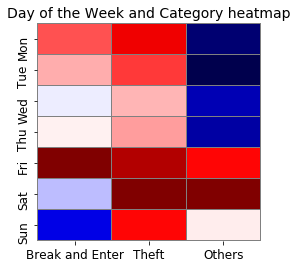

In [24]:
crimes_pivot_table = data.pivot_table(values='TYPE', index='CATEGORY', columns='DAY_OF_WEEK', aggfunc=len)

crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

for i in [2,1]:
    crimes_scaled[crimes_pivot_table.index[i]] = crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max()
                    
crimes_scaled.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(4,4))
plt.title('Day of the Week and Category heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

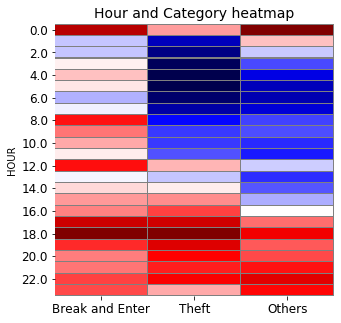

In [25]:
crimes_pivot_table = data.pivot_table(values='TYPE', index='CATEGORY', columns='HOUR', aggfunc=len)

crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

for i in [2,1]:
    crimes_scaled[crimes_pivot_table.index[i]] =  pd.DataFrame(crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max())
                    
plt.figure(figsize=(5,5))
plt.title('Hour and Category heatmap', fontsize=14)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

In [26]:
data['NeighbourhoodID'] = data.groupby('NEIGHBOURHOOD').ngroup().add(1)

In [27]:
print(data)

                                         TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
DATE                                                                            
2003-05-12                        Other Theft  2003      5   12  16.0    15.0   
2003-05-07                        Other Theft  2003      5    7  15.0    20.0   
2003-04-23                        Other Theft  2003      4   23  16.0    40.0   
2003-04-20                        Other Theft  2003      4   20  11.0    15.0   
2003-04-12                        Other Theft  2003      4   12  17.0    45.0   
...                                       ...   ...    ...  ...   ...     ...   
2017-06-17  Break and Enter Residential/Other  2017      6   17  12.0    29.0   
2017-01-18                           Mischief  2017      1   18  14.0    44.0   
2017-03-03  Break and Enter Residential/Other  2017      3    3   9.0    16.0   
2017-05-29                           Mischief  2017      5   29  22.0    30.0   
2017-06-05                 T

In [28]:
data_for_dt = data

In [29]:
X = data_for_dt[['YEAR', 'MONTH', 'DAY','HOUR', 'NeighbourhoodID']]

In [30]:
Y = data_for_dt[['CATEGORY']]

In [31]:
X_train , X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 5)

In [32]:
print(X_train.shape, Y_train.shape)

(316311, 5) (316311, 1)


In [33]:
print(X_test.shape, Y_test.shape)

(135563, 5) (135563, 1)


In [34]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 5,
                               max_depth=5, min_samples_leaf=8)

In [35]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [36]:
Y_pred_gini = clf_gini.predict(X_test)

In [37]:
print ('Accuracy of DT using gini - ', accuracy_score(Y_test,Y_pred_gini) * 100, '%')

Accuracy of DT using gini -  63.949602767716854 %


In [38]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 5,
                                    max_depth=5, min_samples_leaf=8)

In [39]:
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [40]:
Y_pred_entropy = clf_entropy.predict(X_test)

In [41]:
print ('Accuracy of DT using entropy - ', accuracy_score(Y_test,Y_pred_entropy) * 100, '%')

Accuracy of DT using entropy -  63.94001313042644 %


In [42]:
clf_gini.predict([[2003,5,12,16.0,20]])

array(['Theft'], dtype=object)

In [43]:
clf_entropy.predict([[2003,5,12,16.0,20]])

array(['Theft'], dtype=object)

In [44]:
data['CategoryID'] = data.groupby('CATEGORY').ngroup().add(1)
print(data)

                                         TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
DATE                                                                            
2003-05-12                        Other Theft  2003      5   12  16.0    15.0   
2003-05-07                        Other Theft  2003      5    7  15.0    20.0   
2003-04-23                        Other Theft  2003      4   23  16.0    40.0   
2003-04-20                        Other Theft  2003      4   20  11.0    15.0   
2003-04-12                        Other Theft  2003      4   12  17.0    45.0   
...                                       ...   ...    ...  ...   ...     ...   
2017-06-17  Break and Enter Residential/Other  2017      6   17  12.0    29.0   
2017-01-18                           Mischief  2017      1   18  14.0    44.0   
2017-03-03  Break and Enter Residential/Other  2017      3    3   9.0    16.0   
2017-05-29                           Mischief  2017      5   29  22.0    30.0   
2017-06-05                 T

In [45]:
X = data_for_dt[['CategoryID', 'NeighbourhoodID', 'Latitude', 'Longitude']]
Y = data_for_dt[['HOUR']]

In [46]:
X_train , X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 5)

In [47]:
reg = linear_model.LinearRegression() 

In [48]:
reg.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
predicts = reg.predict(X_test)

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(Y_test, predicts)),
        r2_score(Y_test,predicts) * 100,
        mean_absolute_error(Y_test,predicts)
        ))


        Mean Squared Error: 6.72924316541526
        R2 Score: 2.702539387332492
        Mean Absolute Error: 5.596273412423612
     


In [51]:
error_hours = pd.DataFrame({
        'Actual Values': np.array(Y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)
error_hours.head(3)

,Actual Values,Predicted Values
0,20.0,14.269339
1,20.0,14.460032
2,8.0,14.211520


In [52]:
df = pd.read_csv('./crime.csv')

In [53]:
df['DATE'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})

In [54]:
df = df.groupby('DATE').count()['TYPE'].to_frame()
print(df)

            TYPE
DATE            
2003-01-01   191
2003-01-02   148
2003-01-03   160
2003-01-04   146
2003-01-05   120
...          ...
2017-07-09   119
2017-07-10   100
2017-07-11   104
2017-07-12    96
2017-07-13    51

[5308 rows x 1 columns]


In [55]:
df.reset_index(inplace=True)
df.columns = ['ds','y']
df.head()

,ds,y
0,2003-01-01,191
1,2003-01-02,148
2,2003-01-03,160
3,2003-01-04,146
4,2003-01-05,120


In [56]:
df_m1 = df.copy()

In [57]:
df_m1['y'] = np.log(df_m1['y'])
print(df_m1)

             ds         y
0    2003-01-01  5.252273
1    2003-01-02  4.997212
2    2003-01-03  5.075174
3    2003-01-04  4.983607
4    2003-01-05  4.787492
...         ...       ...
5303 2017-07-09  4.779123
5304 2017-07-10  4.605170
5305 2017-07-11  4.644391
5306 2017-07-12  4.564348
5307 2017-07-13  3.931826

[5308 rows x 2 columns]


In [58]:
m1_plain = Prophet()
m1_plain.fit(df_m1)
future = m1_plain.make_future_dataframe(periods=365)
forecast_m1 = m1_plain.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


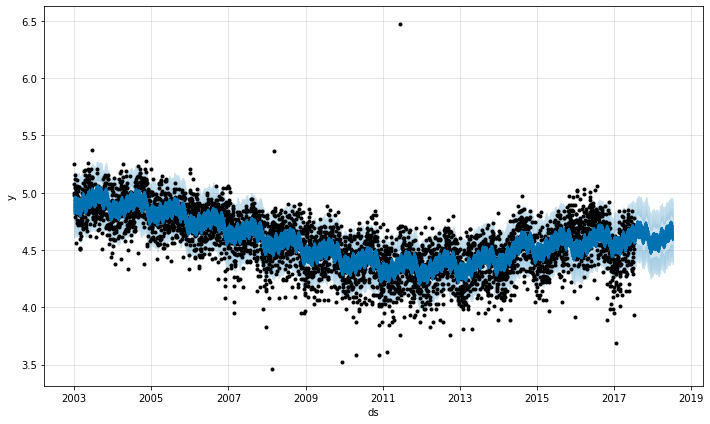

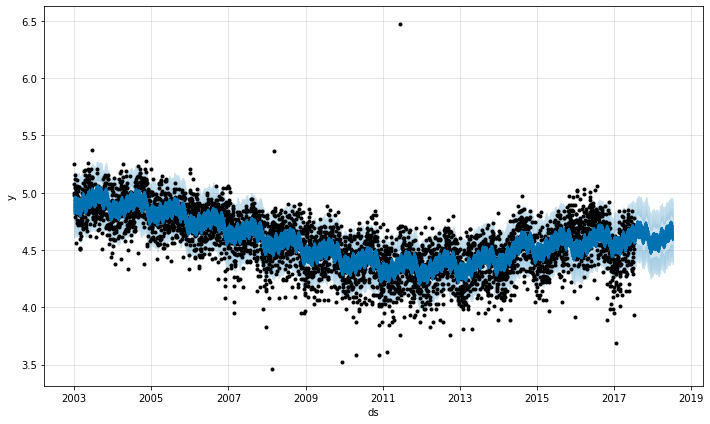

In [59]:
m1_plain.plot(forecast_m1)

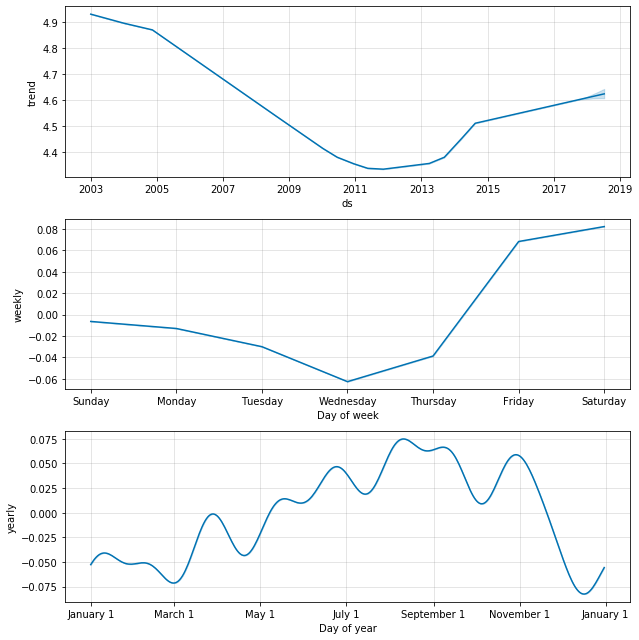

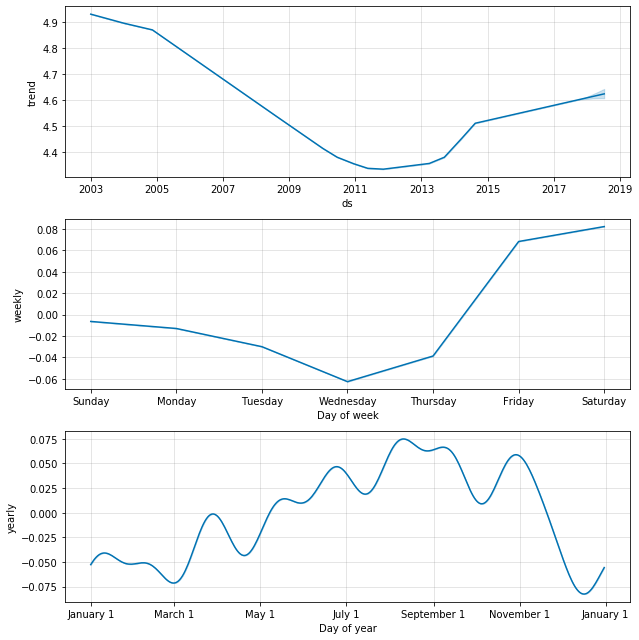

In [60]:
m1_plain.plot_components(forecast_m1)

In [61]:
y = df['y'].to_frame()
y.index = df['ds']
n = np.int(y.count())

In [62]:
forecast_m1_exp = np.exp(forecast_m1[['yhat']])
forecast_m1_exp.index = forecast_m1['ds']

In [63]:
error = forecast_m1_exp['yhat'] - y['y']
MAPE_m1 = (error/y['y']).abs().sum()/n *100
round(MAPE_m1,2)

12.64

In [64]:
start = '2003-01-01'
end = '2003-01-05'
forecast_m1_exp[(forecast_m1_exp.index >= start) & (forecast_m1_exp.index <= end)].astype(int)

,yhat
ds,
2003-01-01,123
2003-01-02,126
2003-01-03,140
2003-01-04,143
2003-01-05,131
